<a href="https://colab.research.google.com/github/NataliiaPyrih/University-Projects/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Імпортування даних

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from google.colab import drive

In [2]:
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/ИАД/Automobile_data.csv')
df.head()

Mounted at /content/drive


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


##Початковий аналіз

In [3]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## Робота з відсутнімі даними

In [6]:
df= df.replace('?', np.NaN)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [7]:
missing_vals=df.isna().sum()
missing_vals

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

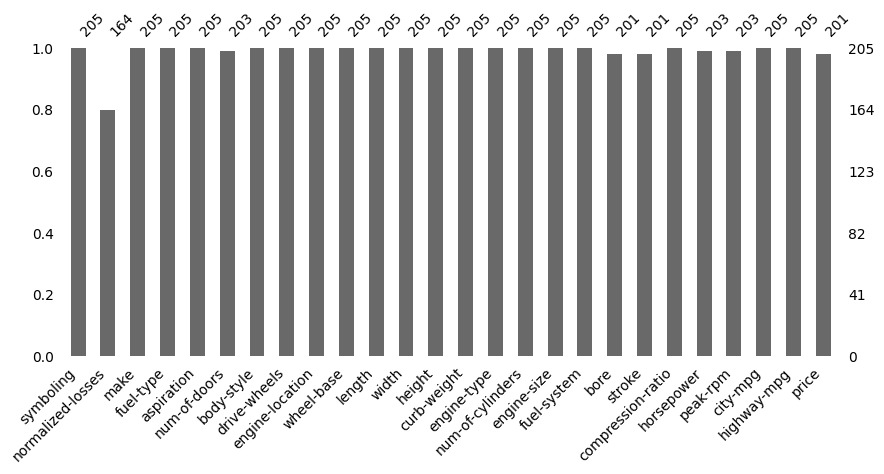

In [8]:
msno.bar(df, figsize=(10,4), fontsize=10)
plt.show()

In [9]:
drop_subset=df.columns[(missing_vals<=len(df)*0.05)&(missing_vals!=0)]
drop_subset

Index(['num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price'], dtype='object')

In [10]:
df.dropna(subset=drop_subset, inplace=True)
df.isnull().sum()

symboling             0
normalized-losses    34
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [11]:
df["normalized-losses"].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '129', '115', '93', '142', '161', '153', '125', '128', '122',
       '103', '168', '108', '194', '231', '119', '154', '74', '186',
       '150', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [12]:
df["normalized-losses"]=df["normalized-losses"].fillna(df["normalized-losses"].value_counts().index[0])

In [13]:
df.isnull().sum().sum()

0

In [14]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


##Зміна типи даних стовпців та перейменування стовпці на більш впізнаваний набір міток

In [15]:
columns_to_int=["normalized-losses", 'horsepower', 'peak-rpm', 'price']
columns_to_float=['bore', 'stroke']
for col in df.columns:
  if col in columns_to_int:
    df[col]=df[col].astype('int')
  elif col in columns_to_float:
    df[col]=df[col].astype('float')
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [16]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'eight'], dtype=object)

In [17]:
df['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [18]:
word_to_num={'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}
columns=["num-of-doors", "num-of-cylinders"]
df[columns]=df[columns].replace(word_to_num)
df[columns].dtypes

num-of-doors        int64
num-of-cylinders    int64
dtype: object

In [19]:
df=df.rename(columns={'make':'manufacturer'})
df.head()

,symboling,normalized-losses,manufacturer,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,161,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,161,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,161,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


##Робота з дублікатами

In [20]:
df.duplicated().sum()

0

##Робота з викидами

In [21]:
from scipy.stats import zscore
outliers=[]
for col in df.columns:
  if df[col].dtype!='O':
    z_scores = zscore(df[col])
    outliers.append(f'{col}: {sum((z_scores > 3) | (z_scores < -3))}')
outliers


['symboling: 0',
 'normalized-losses: 1',
 'num-of-doors: 0',
 'wheel-base: 1',
 'length: 0',
 'width: 0',
 'height: 0',
 'curb-weight: 0',
 'num-of-cylinders: 5',
 'engine-size: 5',
 'bore: 0',
 'stroke: 3',
 'compression-ratio: 8',
 'horsepower: 1',
 'peak-rpm: 2',
 'city-mpg: 3',
 'highway-mpg: 2',
 'price: 3']

<Axes: xlabel='compression-ratio'>

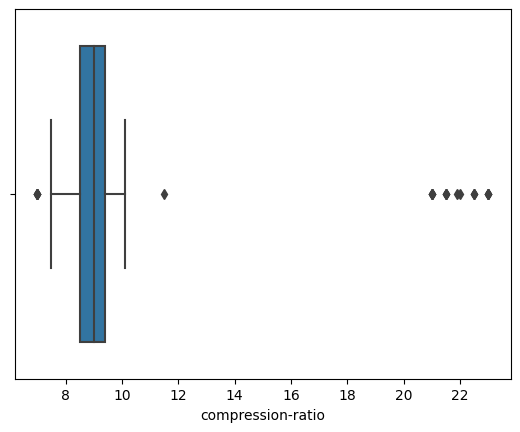

In [22]:
sns.boxplot(data=df, x='compression-ratio')

In [23]:
df.loc[df['compression-ratio'] > 12, 'compression-ratio']=df['compression-ratio'].median()
df['compression-ratio'].unique()

array([ 9.  , 10.  ,  8.  ,  8.5 ,  8.3 ,  8.8 ,  9.5 ,  9.6 ,  9.41,
        9.4 ,  7.6 ,  7.  ,  9.2 , 10.1 ,  9.1 ,  8.1 , 11.5 ,  8.6 ,
        7.5 ,  7.8 ,  8.4 ,  9.31,  9.3 ,  8.7 ,  7.7 ])

<Axes: xlabel='engine-size'>

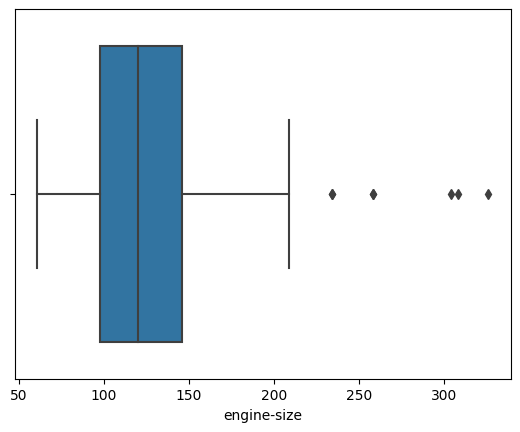

In [24]:
sns.boxplot(data=df, x='engine-size')

In [25]:
df = df[df['engine-size'] < 220]
df['engine-size'].unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119,  91, 140, 134, 183,  97, 103, 120, 181,
       151, 194, 121, 146, 171, 161, 141, 173, 145])

<Axes: xlabel='price'>

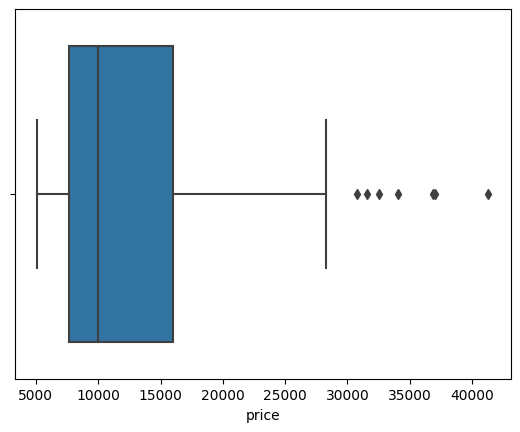

In [26]:
sns.boxplot(data=df, x='price')

## Масштабування  ознак

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_columns=[col for col in df.columns if df[col].dtype!='O']
transformed_data =scaler.fit_transform(df[num_columns])
transformed_data

array([[ 1.77580323,  0.944969  , -1.17669681, ..., -0.76984603,
        -0.66841227,  0.16501369],
       [ 1.77580323,  0.944969  , -1.17669681, ..., -0.76984603,
        -0.66841227,  0.61391421],
       [ 0.15271035,  0.944969  , -1.17669681, ..., -1.09565117,
        -0.82440309,  0.61391421],
       ...,
       [-1.47038253, -0.89520223,  0.84983659, ..., -1.25855375,
        -1.29237554,  1.3585961 ],
       [-1.47038253, -0.89520223,  0.84983659, ...,  0.04466683,
        -0.66841227,  1.50573986],
       [-1.47038253, -0.89520223,  0.84983659, ..., -1.09565117,
        -0.9803939 ,  1.52889446]])

In [28]:
df.to_csv('cleaned_Automobile_data.csv')

## Візуалізація даних

<ipython-input-29-987b6acb08f3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.2f')


<Axes: >

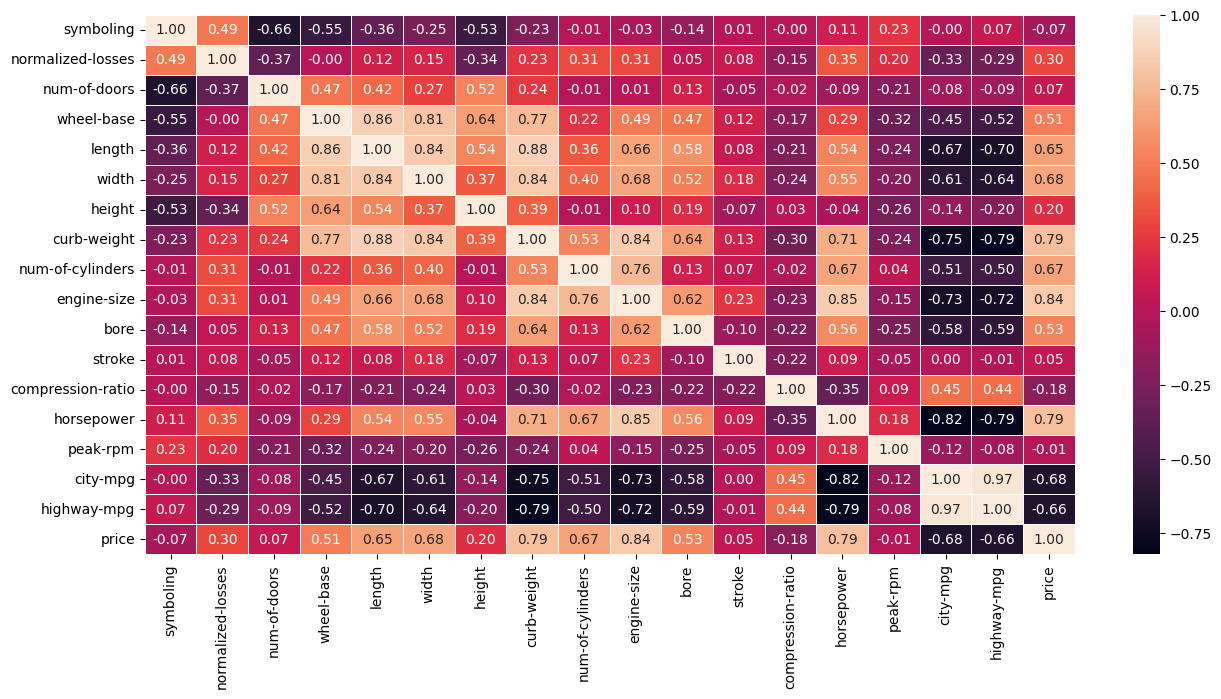

In [29]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.2f')

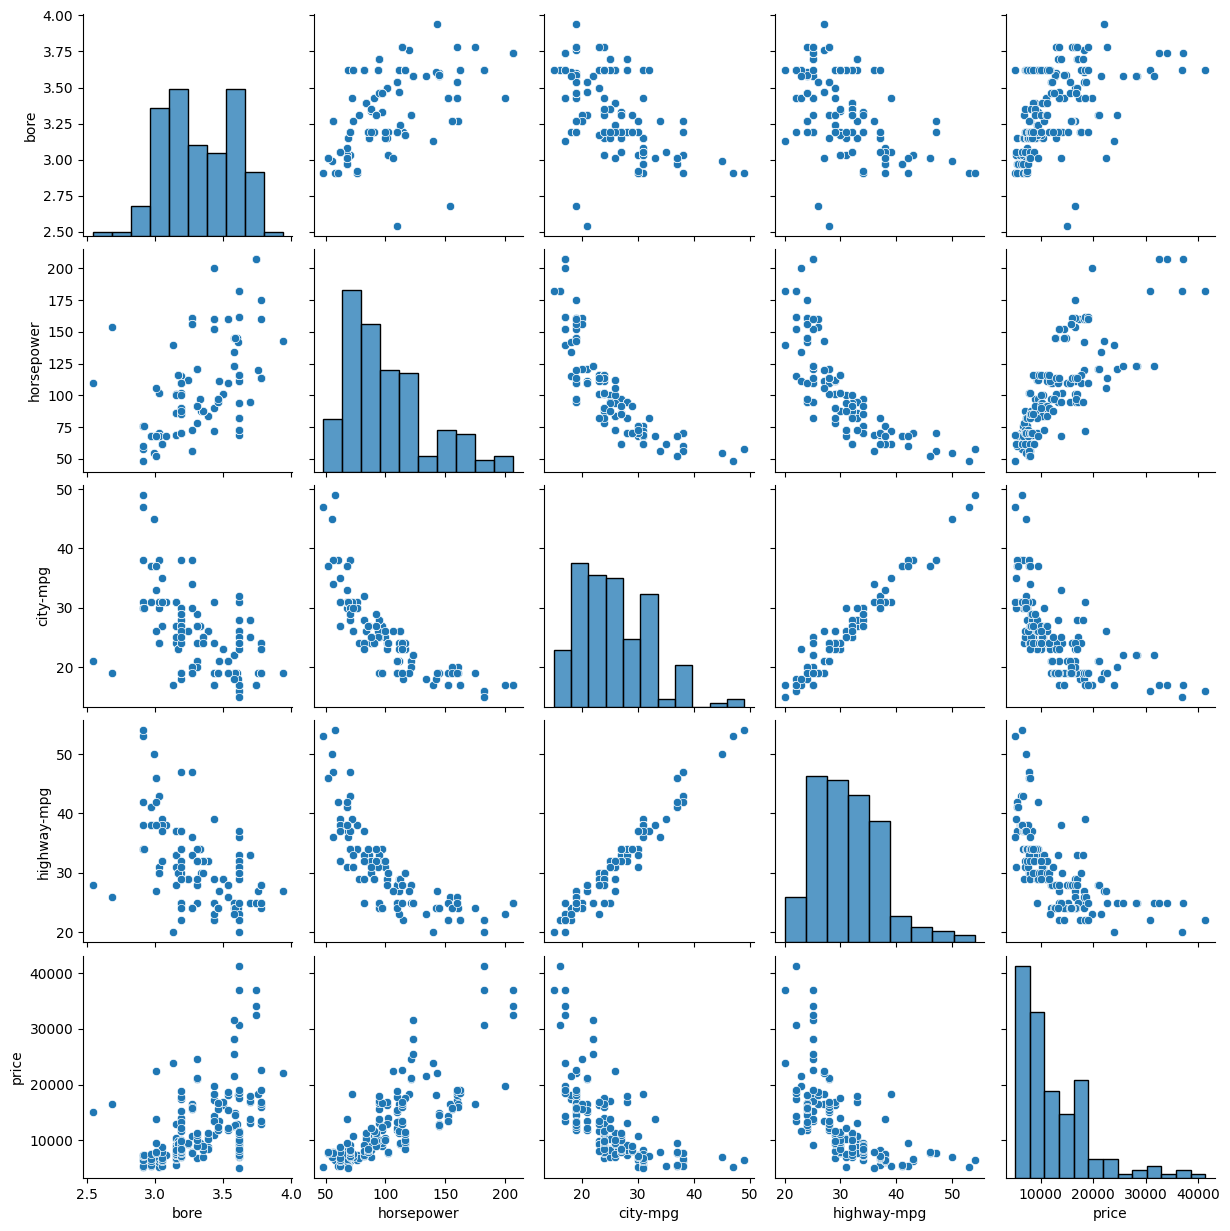

In [30]:
columns=["bore","horsepower", "city-mpg","highway-mpg", "price"]
sns.pairplot(df[columns])

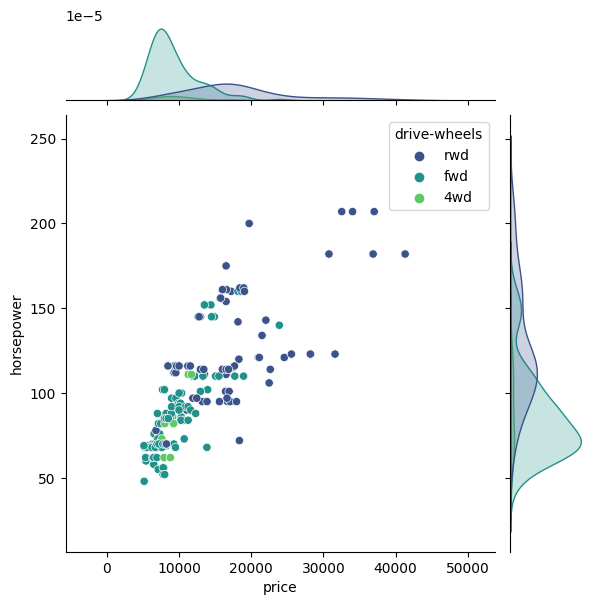

In [31]:
sns.jointplot(data=df, x="price", y="horsepower", hue="drive-wheels", palette='viridis')

<Axes: xlabel='curb-weight', ylabel='Count'>

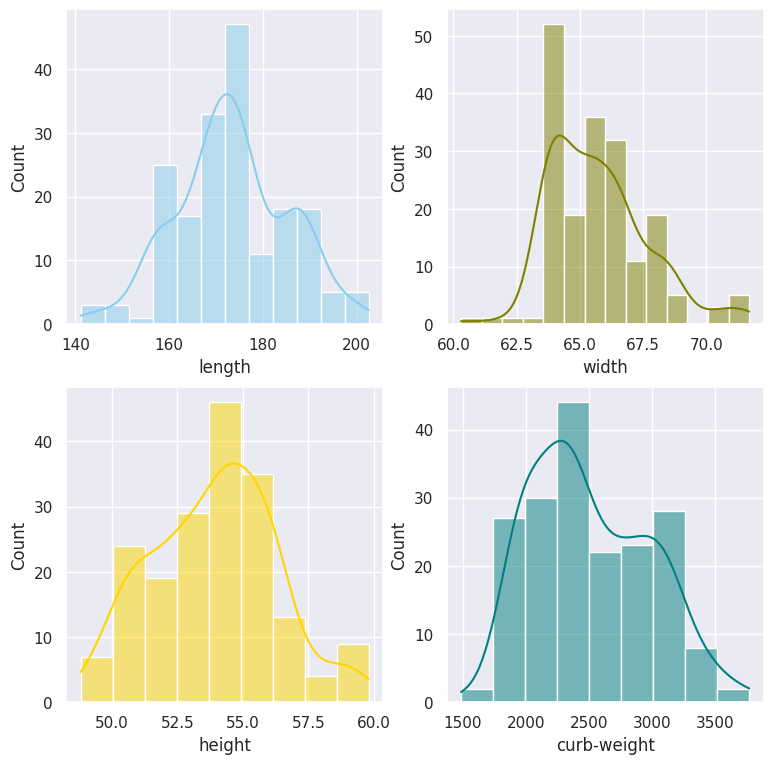

In [32]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(9, 9))
sns.histplot(data=df, x="length", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="width", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="height", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="curb-weight", kde=True, color="teal", ax=axs[1, 1])

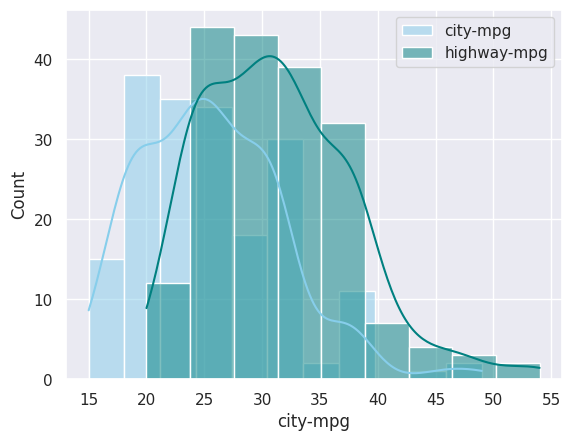

In [33]:
sns.histplot(data=df, x="city-mpg", color="skyblue", label='city-mpg', kde=True)
sns.histplot(data=df, x="highway-mpg", color="teal",label='highway-mpg' ,kde=True)
plt.legend()

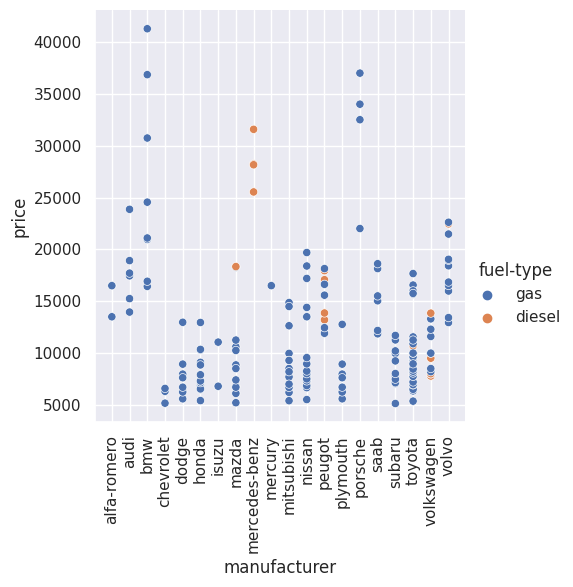

In [34]:
ax=sns.relplot(data=df, x='manufacturer', y="price", hue='fuel-type', kind="scatter")
ax.set_xticklabels(rotation=90)

<Axes: xlabel='engine-size', ylabel='horsepower'>

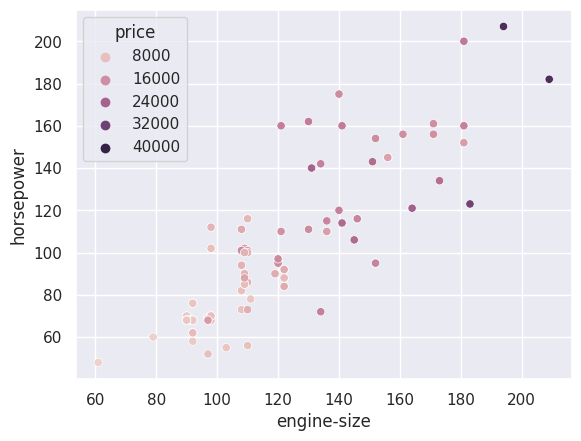

In [35]:
sns.color_palette("hls", 8)
sns.scatterplot(x='engine-size', y='horsepower', hue='price', data=df)

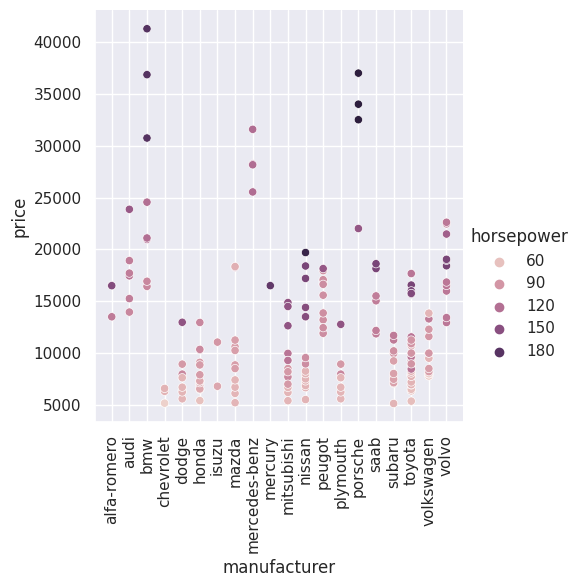

In [36]:
ax=sns.relplot(x='manufacturer', y='price' ,hue='horsepower', data=df, kind='scatter')
ax.set_xticklabels(rotation=90)

<Axes: xlabel='body-style', ylabel='city-mpg'>

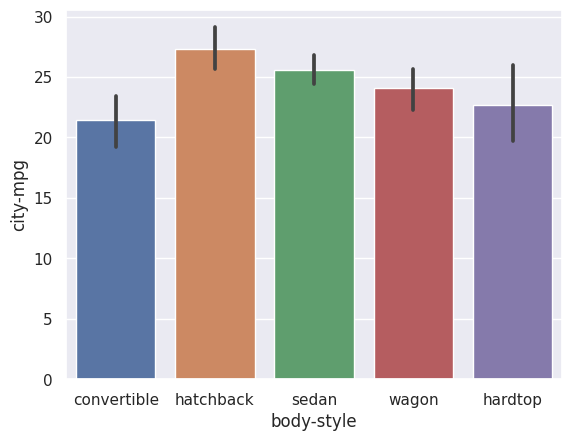

In [37]:
sns.barplot(x='body-style', y='city-mpg', data=df)

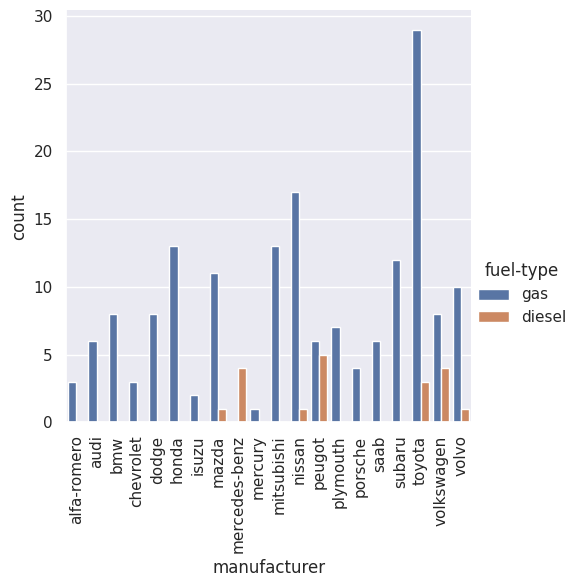

In [38]:
ax=sns.catplot(x='manufacturer', hue='fuel-type', data=df, kind='count')
ax.set_xticklabels(rotation=90)

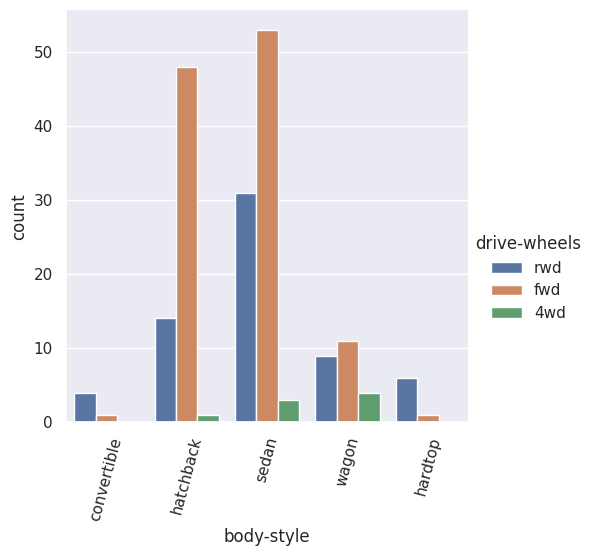

In [39]:
ax=sns.catplot(x='body-style', hue='drive-wheels', data=df, kind='count')
ax.set_xticklabels(rotation=75)